# __Multiple Linear Regression Assignment__

## Bike Sharing Demand Prediction

In this notebook, we'll build a linear regression model to predict `Demand for Shared Bikes.` using an appropriate predictor variable.

The solution is divided into the following sections:
- Data Understanding
- Data Cleaning and Manipulation
- Data Visualization
- Data Preparation
- Model Building
- Model Evaluation
- Observations & Interpretations

### 1. Data Understanding

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
#Importing libraries
import sys                                                                      
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mp
import pandas_profiling as pp
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show, figure

# ML Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

# Supress Warnings
import warnings
%matplotlib inline                                                             
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
bike_data = pd.read_csv("day.csv" , parse_dates=['dteday'])
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
bike_data.shape

(730, 16)

In [6]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 2. Data Cleaning and Manipulation

__a. Drop rows with duplicate instant__

In [7]:
duplicate_rows=bike_data[bike_data.duplicated(['instant'])]
duplicate_rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [8]:
bike_data.drop_duplicates(subset=None, inplace=True)

__No duplicate__ records with same instant

__b. Drop columns irrelevant for the analysis__

In [9]:
bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True) 
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


__c. Rename columns__

In [10]:
bike_data.rename(columns={'yr': 'year', 'mnth': 'month','holiday': 'is_holiday', 'weekday': 'week_day', 'workingday': 'is_working_day',
                   'weathersit':'weather_sit','temp': 'temperature','atemp':'a_temperature','hum':'humidity',
                   'windspeed':'wind_speed','cnt':'count'}, inplace=True)

In [11]:
bike_data.columns

Index(['season', 'year', 'month', 'is_holiday', 'week_day', 'is_working_day',
       'weather_sit', 'temperature', 'a_temperature', 'humidity', 'wind_speed',
       'count'],
      dtype='object')

In [12]:
bike_data.head()

,season,year,month,is_holiday,week_day,is_working_day,weather_sit,temperature,a_temperature,humidity,wind_speed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- __Categorical Variables__
    1. season
    2. year
    3. month
    4. is_holiday
    5. week_day
    6. is_working_day
    7. weather_sit
    
- __Continuous Variables__
    1. temperature
    2. a_temperature
    3. humidity
    4. wind_speed    

### 3. Data Visualization

__a. Correlation between continuous numerical variables__

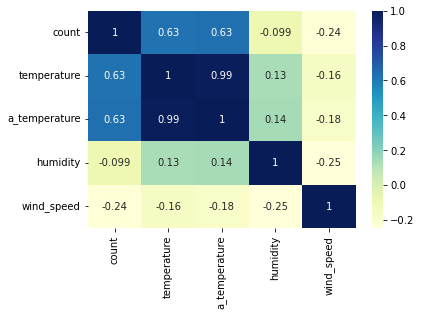

In [13]:
sns.heatmap(bike_data[['count', 'temperature', 'a_temperature', 'humidity','wind_speed']].corr(),annot=True, cmap='YlGnBu' )
plt.show()

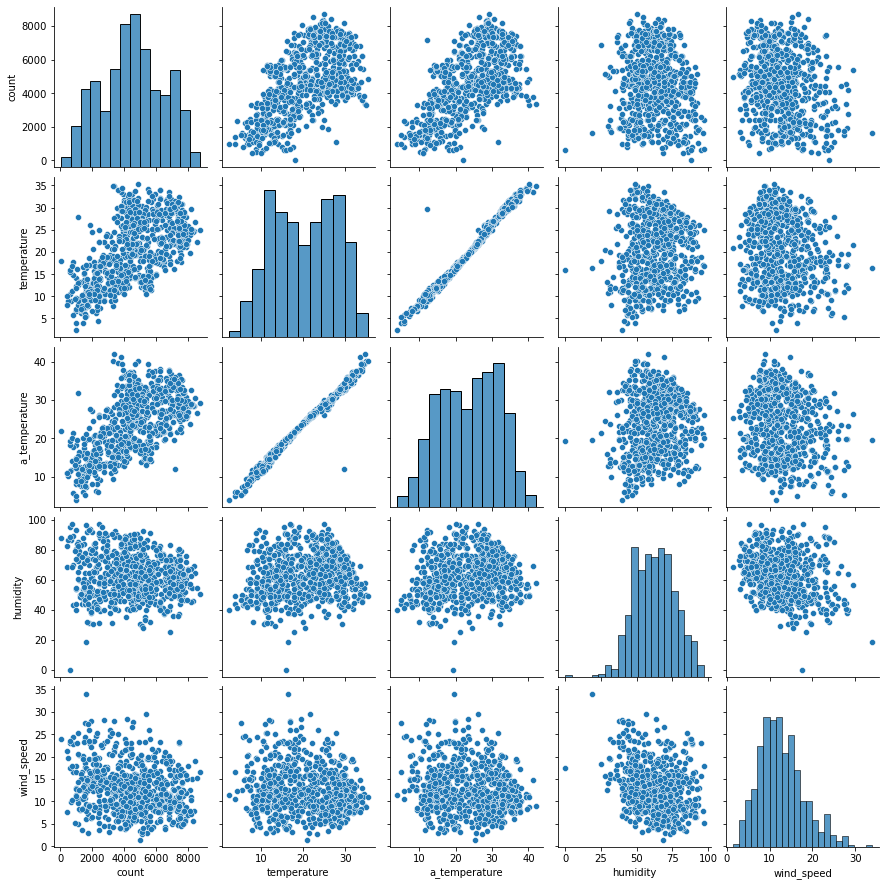

In [14]:
sns.pairplot(data=bike_data,vars=['count', 'temperature', 'a_temperature', 'humidity','wind_speed'])
plt.show()

From the above two graphs, it is evident that __temperature__ and __a_temperature__ are highly correlated. Also, these variables are somewhat linearly corelated with target variable.

__b. Impact of categorical variables on target variable.__

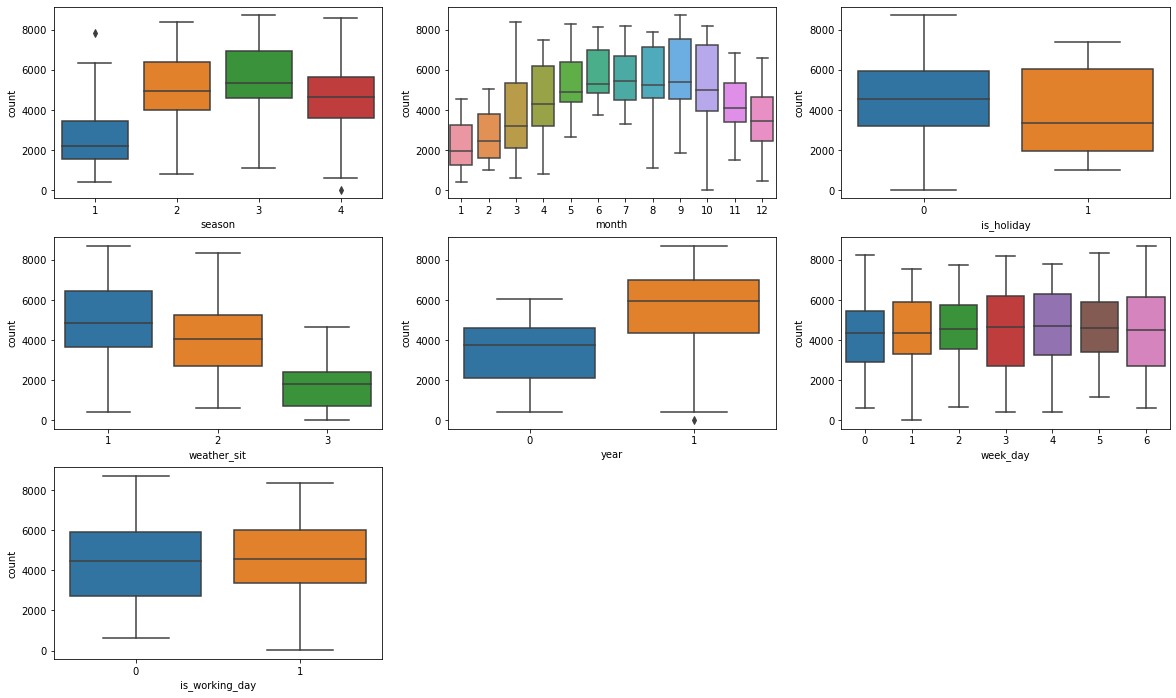

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'is_holiday', y = 'count', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weather_sit', y = 'count', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'year', y = 'count', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'week_day', y = 'count', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'is_working_day', y = 'count', data = bike_data)
plt.show()

__Observations:__
- Number of user is the __highest__ in __Fall season, followed by Summer__. __Spring season__ has the __lowest__ number of bikers.
- The demand for bikes are __higher in July and September__ comparitively.
- The usage of bikes on __weekday is higher than on holida__y. Also, the bike usage thoughout the week days are almost the same.
- People prefer to ride bikes on a __clear or partly cloudy day__. There is __no demand__ of bikes on during __heavy rain or thunderstorm.__

### 4. Data Preparation

__a. Convert numeric columns to categorical variables as per data dictionary__

In [16]:
# Map Months 
import calendar
bike_data['month'] = bike_data['month'].apply(lambda x: calendar.month_abbr[x])
bike_data.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [17]:
# Map Seasons
bike_data['season'] = bike_data['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike_data.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [18]:
# Map Weather Sit
bike_data['weather_sit'] = bike_data['weather_sit'].map({1:'Clear', 2:'Mist_Cloudy', 3:'Light_Snow', 4:'Heavy_Rain'})
bike_data.weather_sit.unique()

array(['Mist_Cloudy', 'Clear', 'Light_Snow'], dtype=object)

In [19]:
# Map Weekday
bike_data['week_day'] = bike_data['week_day'].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday",
                                                   4:"Thursday", 5:"Friday", 6:"Saturday"})
bike_data.week_day.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [20]:
bike_data.head()

,season,year,month,is_holiday,week_day,is_working_day,weather_sit,temperature,a_temperature,humidity,wind_speed,count
0,Spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


__b. Create dummy for all categorical variables.__

In [21]:
bike_data = pd.get_dummies(bike_data, drop_first=True)
bike_data.head()

,year,is_holiday,is_working_day,temperature,a_temperature,humidity,wind_speed,count,season_Spring,season_Summer,...,month_Oct,month_Sep,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_sit_Light_Snow,weather_sit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
bike_data.columns

Index(['year', 'is_holiday', 'is_working_day', 'temperature', 'a_temperature',
       'humidity', 'wind_speed', 'count', 'season_Spring', 'season_Summer',
       'season_Winter', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep', 'week_day_Monday', 'week_day_Saturday',
       'week_day_Sunday', 'week_day_Thursday', 'week_day_Tuesday',
       'week_day_Wednesday', 'weather_sit_Light_Snow',
       'weather_sit_Mist_Cloudy'],
      dtype='object')

__c. Split Data into training and test set__

In [23]:
#Train Test split with 70:30 ratio
bike_data_train, bike_data_test = train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)

In [24]:
#Inspect independent variables
bike_data_train.head()

,year,is_holiday,is_working_day,temperature,a_temperature,humidity,wind_speed,count,season_Spring,season_Summer,...,month_Oct,month_Sep,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_sit_Light_Snow,weather_sit_Mist_Cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [25]:
# Check shape and size for train and test fro independent variables
print(bike_data_train.shape)
print(bike_data_test.shape)

(510, 30)
(219, 30)


__d. Feature Scaling__

In [26]:
vars = ['temperature','a_temperature','humidity','wind_speed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
bike_data_train[vars] = scaler.fit_transform(bike_data_train[vars])

In [27]:
bike_data_train.head()

,year,is_holiday,is_working_day,temperature,a_temperature,humidity,wind_speed,count,season_Spring,season_Summer,...,month_Oct,month_Sep,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_sit_Light_Snow,weather_sit_Mist_Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [28]:
#Inspect status of Training set after scaling
bike_data_train.describe()

,year,is_holiday,is_working_day,temperature,a_temperature,humidity,wind_speed,count,season_Spring,season_Summer,...,month_Oct,month_Sep,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_sit_Light_Snow,weather_sit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Model Building

__a. Divide train set into X and y for model building__

In [29]:
# y to contain only target variable
y_train = bike_data_train.pop('count')

#X is all remainign variable also our independent variables
X_train = bike_data_train

__b. Feature Selection using RFE__

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# Select top 15  features
rfe = RFE(lm, 15)           
rfe = rfe.fit(X_train, y_train)

In [31]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('is_holiday', True, 1),
 ('is_working_day', True, 1),
 ('temperature', True, 1),
 ('a_temperature', False, 6),
 ('humidity', True, 1),
 ('wind_speed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('month_Aug', False, 13),
 ('month_Dec', False, 3),
 ('month_Feb', False, 4),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 5),
 ('month_Mar', False, 9),
 ('month_May', False, 15),
 ('month_Nov', False, 2),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('week_day_Monday', False, 14),
 ('week_day_Saturday', True, 1),
 ('week_day_Sunday', False, 7),
 ('week_day_Thursday', False, 12),
 ('week_day_Tuesday', False, 8),
 ('week_day_Wednesday', False, 10),
 ('weather_sit_Light_Snow', True, 1),
 ('weather_sit_Mist_Cloudy', True, 1)]

In [32]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['year', 'is_holiday', 'is_working_day', 'temperature', 'humidity',
       'wind_speed', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_Jan', 'month_Jul', 'month_Sep', 'week_day_Saturday',
       'weather_sit_Light_Snow', 'weather_sit_Mist_Cloudy'],
      dtype='object')

In [33]:
X_train.shape

(510, 29)

In [34]:
#Function to build a linear model using statsmodel api
def build_model(selectedCols):
    X_train_sm = sm.add_constant(X_train[selectedCols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    #print(lm.params)
    print(lm.summary())
    return lm

In [35]:
#Function to calculate VIFs and print them
def get_vif(selectedCols):
    df = X_train[selectedCols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1

In [36]:
# selecting all the columns supported by RFE
cols = ['year', 'is_holiday', 'is_working_day', 'temperature', 'humidity',
       'wind_speed', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_Jan', 'month_Jul', 'month_Sep', 'week_day_Saturday',
       'weather_sit_Light_Snow', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.31e-191
Time:                        16:44:16   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

All the variables have p-value less than 0.05. However, __humidity has a high VIF of 29.40__. Hence, dropping humidity from the list of selected columns. R-square and Adjusted R-square are __0.849__ and __0.844__ respectively.

### Model 2

In [37]:
#Removing humidity variable
cols = ['year', 'is_holiday', 'is_working_day', 'temperature',
       'wind_speed', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_Jan', 'month_Jul', 'month_Sep', 'week_day_Saturday',
       'weather_sit_Light_Snow', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.33e-189
Time:                        16:44:16   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

 All the variables have p-value less than 0.05. Temperature has high corelation with target variable and though it has high VIF, it should not be dropped. __weather_sit_Light_Snow__ variable is negatively corelated with target variable and hence, __dropping weather_sit_Light_Snow__ from the list of selected columns. R-square and Adjusted R-square are __0.843__ and __0.839__ respectively.

### Model 3

In [38]:
#Removing weather_sit_Light_Snow variable
cols = ['year', 'is_working_day', 'temperature',
       'wind_speed', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_Jan', 'month_Jul', 'month_Sep', 'week_day_Saturday','is_holiday', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.51e-162
Time:                        16:44:16   Log-Likelihood:                -4180.0
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     496   BIC:                             8447.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Removing __weather_sit_Light_Snow__ variable dropped the value of R-square and Adjusted R-square. Removing __is_holiday__ variable as it has p-value of __0.118__

### Model 4

In [39]:
cols = ['year', 'is_working_day', 'temperature',
       'wind_speed', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_Jan', 'month_Jul', 'month_Sep', 'week_day_Saturday',
        'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.91e-163
Time:                        16:44:16   Log-Likelihood:                -4181.2
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     497   BIC:                             8444.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Removing __month_Jan__ variable as it has p-value of __0.086__.

### Model 5

In [40]:
cols =  ['year', 'is_working_day', 'temperature','wind_speed', 'season_Spring', 
         'season_Summer', 'season_Winter', 'month_Jul', 'month_Sep', 'week_day_Saturday',
         'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.25e-163
Time:                        16:44:16   Log-Likelihood:                -4182.8
No. Observations:                 510   AIC:                             8390.
Df Residuals:                     498   BIC:                             8440.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

All variables have p-value less than 0.05. Dropping __windspeed__ variable as it negatively correlated with target variable 

### Model 6

In [41]:
cols =  ['year', 'is_working_day', 'temperature', 'season_Spring', 
         'season_Summer', 'season_Winter', 'month_Jul', 'month_Sep', 'week_day_Saturday',
         'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.55e-156
Time:                        16:44:16   Log-Likelihood:                -4203.1
No. Observations:                 510   AIC:                             8428.
Df Residuals:                     499   BIC:                             8475.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Experimenting by removing __season_Summer__ as it has __high p-value__ comparitively.          

### Model 7

In [42]:
cols =  ['year', 'is_working_day', 'temperature', 'season_Spring', 
         'season_Winter', 'month_Jul', 'month_Sep', 'week_day_Saturday',
         'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     192.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.47e-156
Time:                        16:44:16   Log-Likelihood:                -4205.5
No. Observations:                 510   AIC:                             8431.
Df Residuals:                     500   BIC:                             8473.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

R-square and Adjusted R-square did not drop much. Lets try to remove __is_working_day__ as this column does not add much value.

### Model 8

In [43]:
cols =  ['year', 'temperature', 'season_Spring', 
         'season_Winter', 'month_Jul', 'month_Sep', 'week_day_Saturday',
         'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     210.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.03e-154
Time:                        16:44:16   Log-Likelihood:                -4212.1
No. Observations:                 510   AIC:                             8442.
Df Residuals:                     501   BIC:                             8480.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

The p-value of __week_day_Saturday__ variable increased significantly. We can try to replace it with __week_day_Sunday__ as it is also weekend day. Also, __VIF of temperature__ is with permissible limit of 5.

### Model 9

In [44]:
cols =  ['year', 'temperature', 'season_Spring', 
         'season_Winter', 'month_Jul', 'month_Sep', 'week_day_Sunday',
         'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     213.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.56e-156
Time:                        16:44:16   Log-Likelihood:                -4209.1
No. Observations:                 510   AIC:                             8436.
Df Residuals:                     501   BIC:                             8474.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Adding __weather_sit_Light_Snow__ as dropping it, dropped the value of R-square and Adjuested R-Square in Model 3

### Model 10

In [45]:
cols =  ['year', 'temperature', 'season_Spring', 'season_Winter', 'month_Jul', 'month_Sep', 'week_day_Sunday',
         'weather_sit_Light_Snow', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.75e-181
Time:                        16:44:17   Log-Likelihood:                -4146.7
No. Observations:                 510   AIC:                             8313.
Df Residuals:                     500   BIC:                             8356.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Adding __weather_sit_Light_Snow__, improved R-score without impacting other variable. The p-value and VIF of all the variables is less than 0.05 and 5 respectively. Therefore, we will select this model for Model Evaluation.

In [46]:
final_cols = cols

### 6. Model Evaluation

__a. Residual Analysis__

In [47]:
# Error terms
def plot_err_terms(residual,length,figLabel):
    c = [i for i in range(1,length+1,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c , residual, color="orange", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms of ' + figLabel, fontsize=20)
    plt.xlabel('Index', fontsize = 15)                      
    plt.ylabel('Errors', fontsize = 15) 

In [48]:
X_train = X_train[final_cols]

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
y_train_pred = lm.predict(X_train)

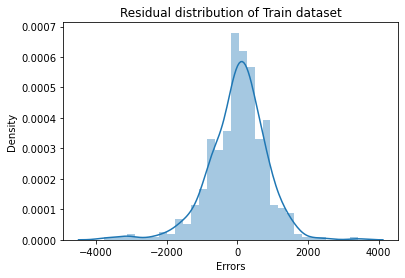

In [50]:
residual = y_train - y_train_pred
sns.distplot(residual)
plt.title('Residual distribution of Train dataset')
plt.xlabel('Errors')
plt.show()

In [51]:
#R-squared Value of train data set
r2_score(y_train,y_train_pred)

0.8223447786459568

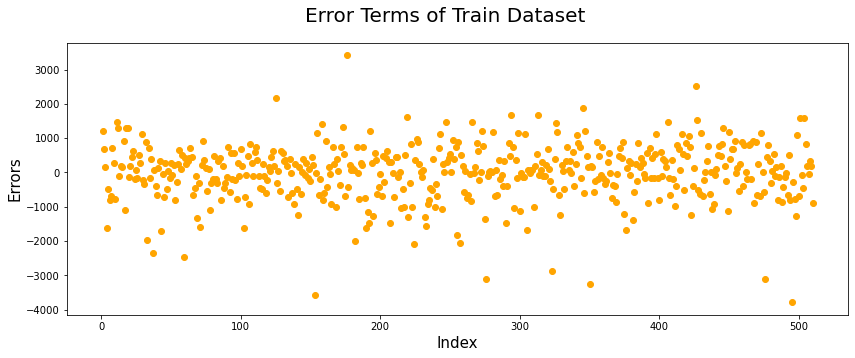

In [52]:
#Plot error terms for train data set
plot_err_terms(y_train - y_train_pred, len(y_train), 'Train Dataset')

__b. Predictions on test set__

In [53]:
# y to contain only target variable
y_test = bike_data_test.pop('count')

#X is all remaining variable also our independent variables
X_test = bike_data_test

In [54]:
#Scale variables in X_test
num_vars = ['temperature','a_temperature','humidity','wind_speed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [55]:
#Predict the values for test data
y_test_pred = lm.predict(X_test[cols])

In [56]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8109805303678386

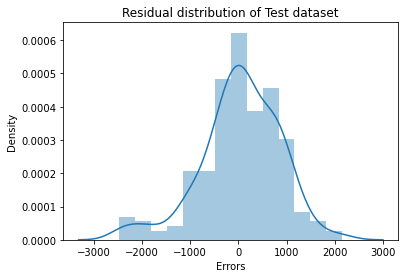

In [57]:
residual = y_test - y_test_pred
sns.distplot(residual)
plt.title('Residual distribution of Test dataset')
plt.xlabel('Errors')
plt.show()

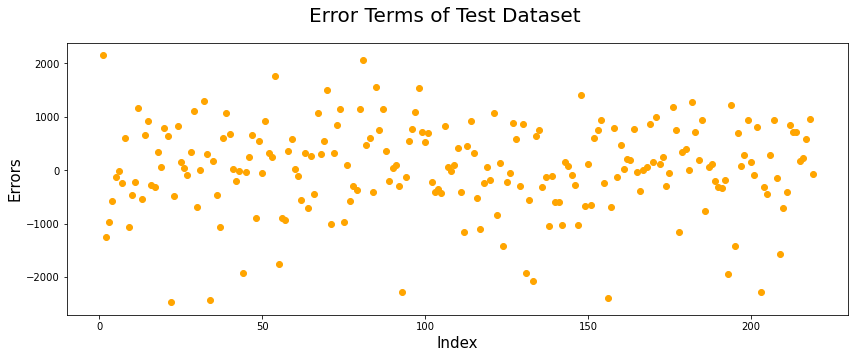

In [58]:
#Plot error terms for test data
plot_err_terms(y_test - y_test_pred, len(y_test), 'Test Dataset')

__c. Plot Actual v/s Predicted values__

In [59]:
def plot_act_pred(actual,predicted,scale,dataname):
    c = [i for i in range(1,scale + 1 ,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c, actual, color="green", linewidth=2.5, linestyle="-", label='Actual')
    plt.plot(c, predicted, color="red",  linewidth=2.5, linestyle="-.", label='Predicted')
    fig.suptitle('Actual and Predicted - '+ dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)
    plt.legend()

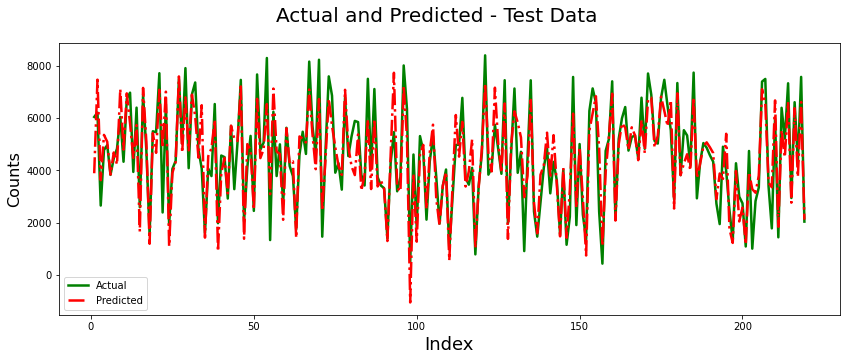

In [60]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test, y_test_pred, len(y_test),'Test Data')

### 7. Observations & Interpretations

#### Observations 